### Load the dataset

In [1]:
from sklearn.datasets import load_boston
boston = load_boston()

### Dataset characteristics

In [2]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
print(f'  Data shape = {boston.data.shape}')
print(f'Target shape = {boston.target.shape}')

  Data shape = (506, 13)
Target shape = (506,)


In [4]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

### Load data into a dataframe and explore

In [5]:
import pandas as pd

boston_df = pd.DataFrame(boston.data, 
                             columns=boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


#### target value MEDV is missing, we create a new column for MEDV and add into data frame

In [6]:
boston_df['MEDV'] = pd.Series(boston.target)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Data visualizations

We use heatmap to visualize the linear relationship between variables. In this case, we are only looking at the realtionship to MEDV column.

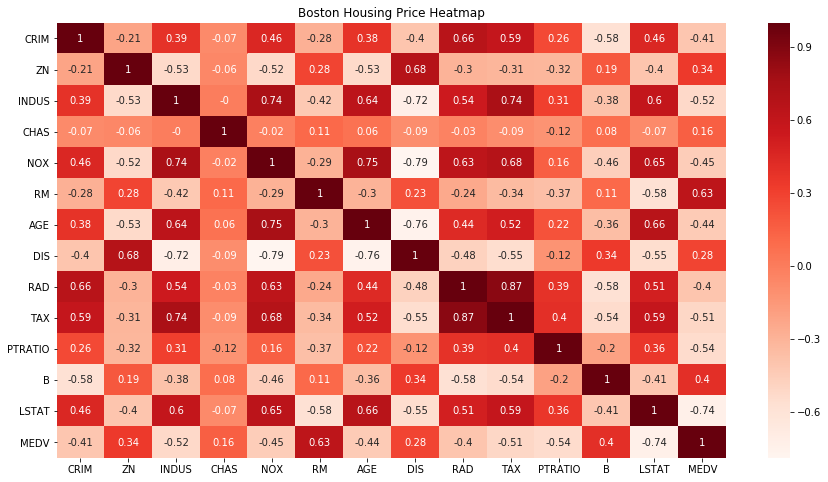

In [8]:
sample_df = boston_df.sample(frac=0.4) # sample data to 40%
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,8))
correlation_matrix = sample_df.corr().round(2)
# annot = True to print the values inside the square
axe=sns.heatmap(data=correlation_matrix, annot=True,cmap="Reds")
axe.set_title('Boston Housing Price Heatmap');

###### From heatmap, we can see: CHAS, DIS,B have week corrlation between MEDV with coefficient of 0.16, 0.28 and 0.4 respectively.

In [9]:
sns.set(font_scale=2)
sns.set_style('whitegrid')

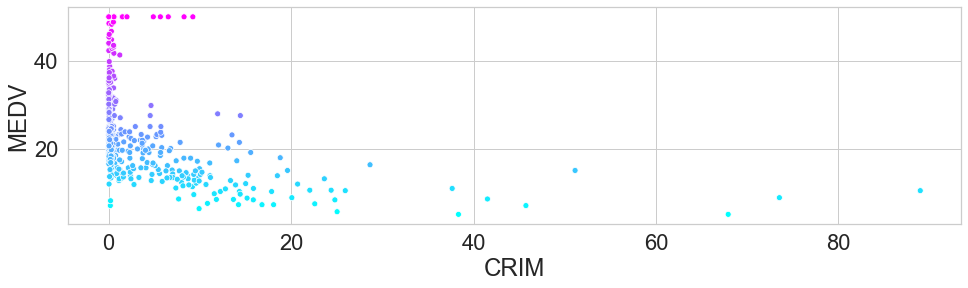

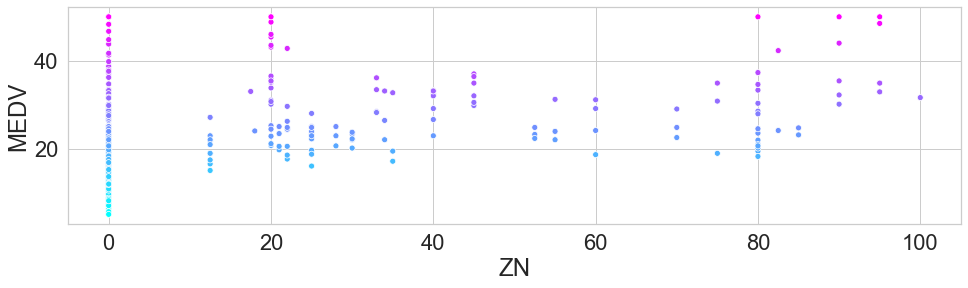

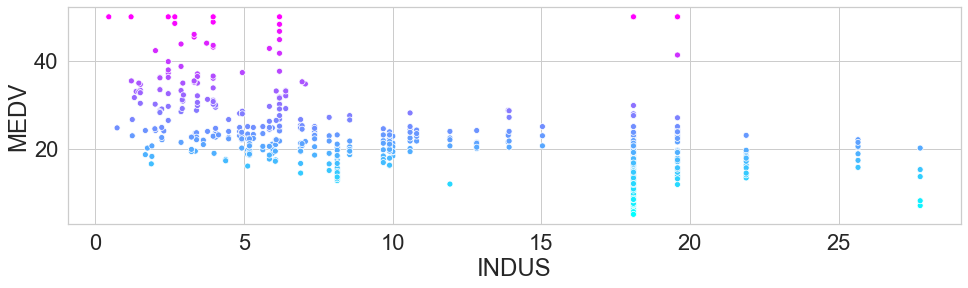

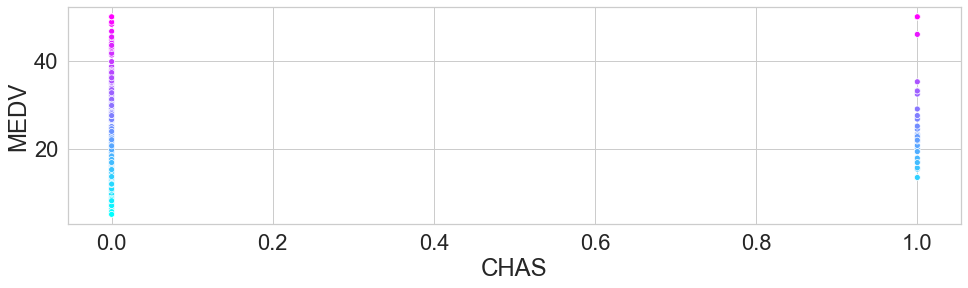

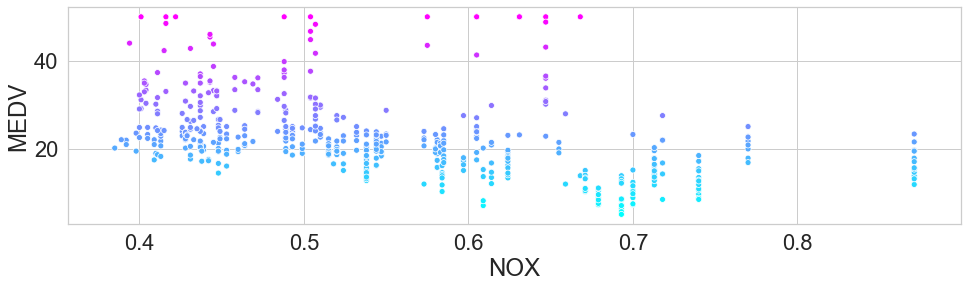

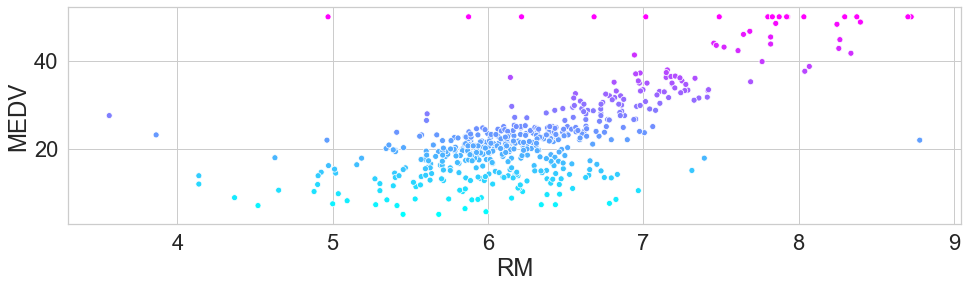

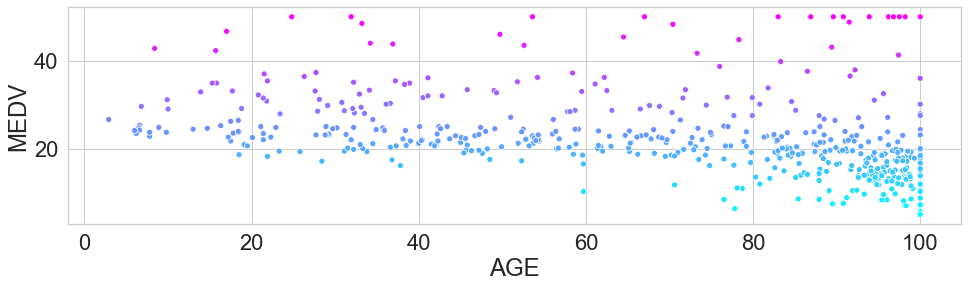

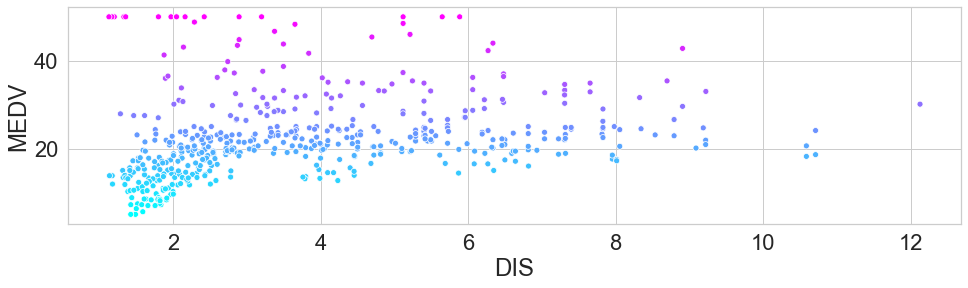

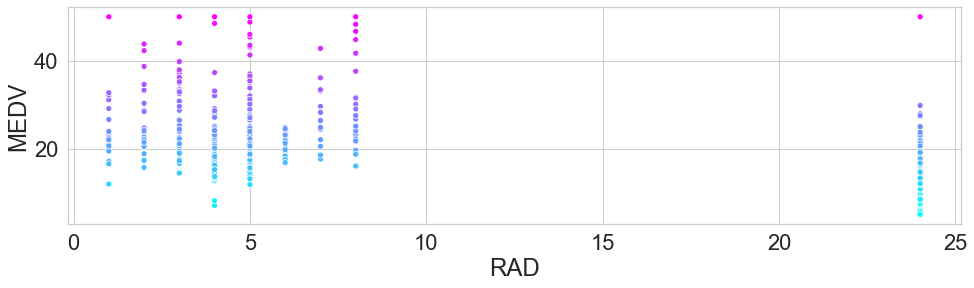

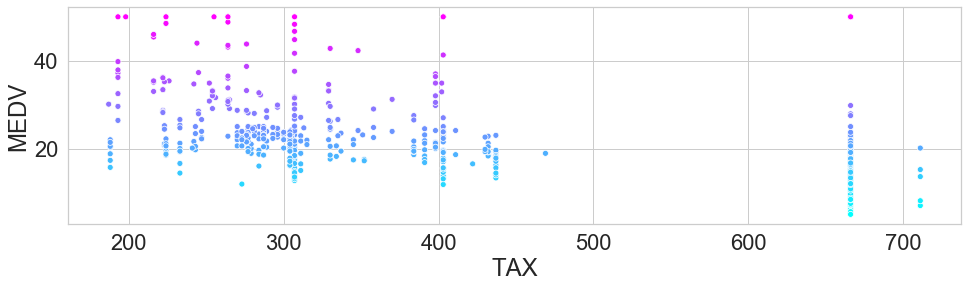

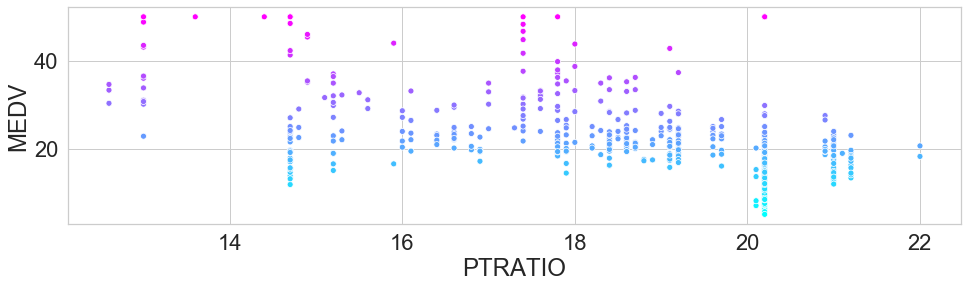

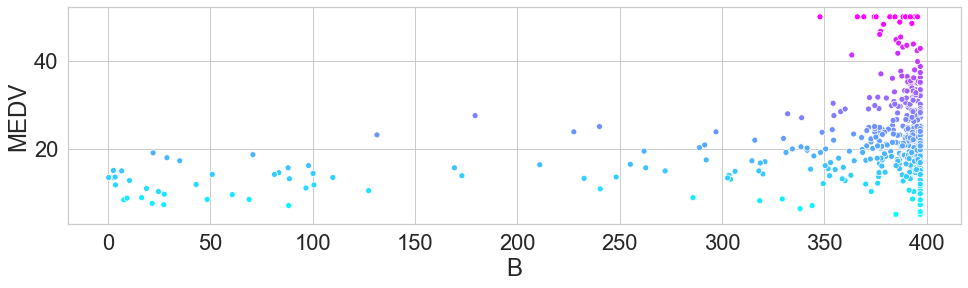

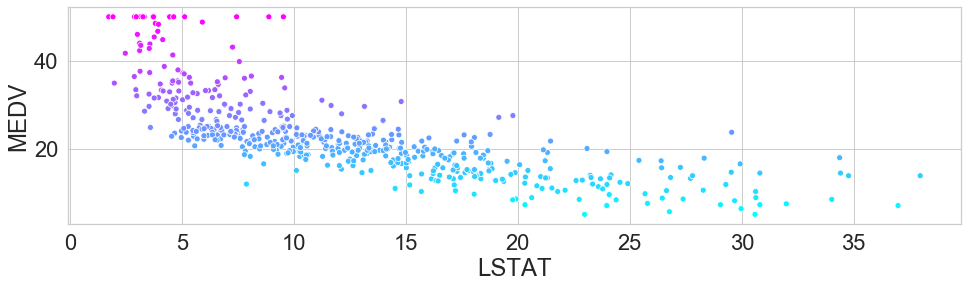

In [18]:
# We used the full data set to plot these graphs because there is not that many data points to see the trend if we use the sample.
for feature in boston.feature_names:
     plt.figure(figsize=(16, 4))
     sns.scatterplot(data=boston_df, x=feature, y='MEDV', 
                     hue='MEDV', 
                     palette='cool', legend=False)

### Split the data for training and testing

In [16]:
from sklearn.model_selection import train_test_split
import numpy as np
boston_data_new = np.delete(boston.data,3,1)
# We found that CHAS contains only variables 0 and 1, which may hurt our regression model
X_train, X_test, y_train, y_test = \
    train_test_split(boston_data_new, boston.target, random_state=5)

print(f'Shape of training set = {X_train.shape}')
print(f'Shape of testing  set = {X_test.shape}')

Shape of training set = (379, 12)
Shape of testing  set = (127, 12)


### Train the model

In [13]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

for i, name in enumerate(np.delete(boston.feature_names,3,0)):
    print(f'{name:>11}: {linear_regression.coef_[i]:24.20f}')

print()
print(f'y-intercept: {linear_regression.intercept_:23.20f}')

       CRIM:  -0.15913839634194795747
         ZN:   0.04890147232976368302
      INDUS:   0.01445084249427397612
        NOX: -13.69906809612140463628
         RM:   3.95110016068859470906
        AGE:  -0.00539332527178060499
        DIS:  -1.45933358556167180886
        RAD:   0.36650893681391799594
        TAX:  -0.01395246623283373857
    PTRATIO:  -0.95282684633969105814
          B:   0.01359438499293804704
      LSTAT:  -0.53257535640300879276

y-intercept: 32.62557602342805296303


### Test the model

In [14]:
import math
from sklearn import metrics

predicted = linear_regression.predict(X_test)
expected  = y_test

r2 = metrics.r2_score(expected, predicted)
r  = math.sqrt(r2)

print(f'coefficient of determination = {r2:.1f}')
print(f'     correlation coefficient = {r:.1f}')

coefficient of determination = 0.7
     correlation coefficient = 0.8


### Visualize the expected vs. predicted prices

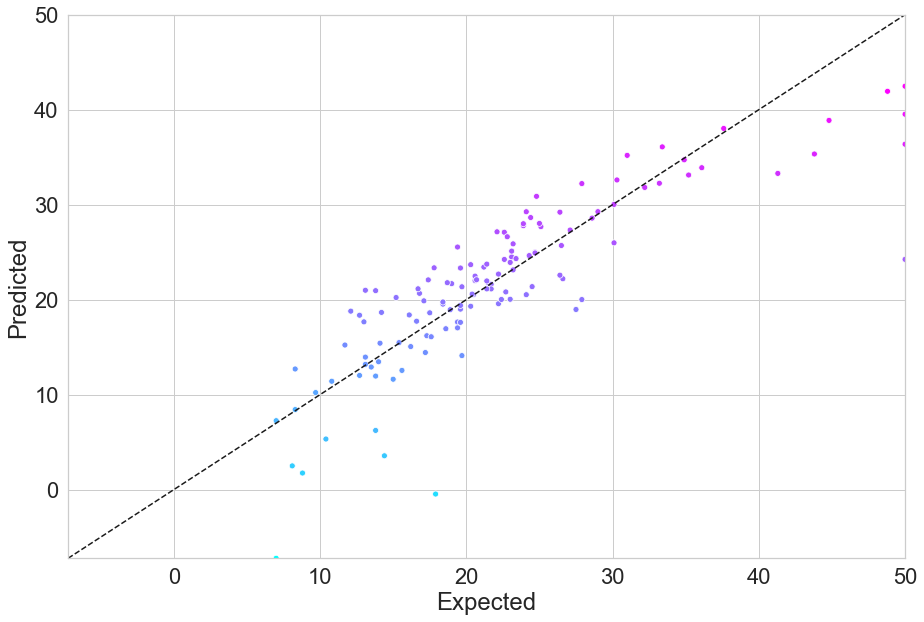

In [15]:
df = pd.DataFrame()

df['Expected']  = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)

figure = plt.figure(figsize=(15, 10))

axes = sns.scatterplot(data=df, x='Expected', y='Predicted', 
                       hue='Predicted', palette='cool', 
                       legend=False)

start = min(expected.min(), predicted.min())
end   = max(expected.max(), predicted.max())

axes.set_xlim(start, end)
axes.set_ylim(start, end)

line = plt.plot([start, end], [start, end], 'k--')